In [1]:
!pip install nltk
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import re
import unicodedata
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import html
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def get_data(path="/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification"):
    train=pd.read_csv(os.path.join(path,"train.csv"),nrows=50000)
    test=pd.read_csv(os.path.join(path,"test.csv"))
    return train,test

In [3]:
train_df,test_df=get_data()

In [4]:
train_df.isna().sum()

id                                         0
target                                     0
comment_text                               0
severe_toxicity                            0
obscene                                    0
identity_attack                            0
insult                                     0
threat                                     0
asian                                  40199
atheist                                40199
bisexual                               40199
black                                  40199
buddhist                               40199
christian                              40199
female                                 40199
heterosexual                           40199
hindu                                  40199
homosexual_gay_or_lesbian              40199
intellectual_or_learning_disability    40199
jewish                                 40199
latino                                 40199
male                                   40199
muslim    

In [5]:
test_df.isna().sum()

id              0
comment_text    0
dtype: int64

In [6]:
train_df=train_df.dropna(subset=['comment_text'])

In [7]:
x_train=train_df[['comment_text']]
y_train=train_df[['target']]

In [8]:
test_df

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...
...,...,...
97315,7194635,He should lose his job for promoting mis-infor...
97316,7194636,"""Thinning project is meant to lower fire dange..."
97317,7194637,I hope you millennials are happy that you put ...
97318,7194638,I'm thinking Kellyanne Conway (a.k.a. The Trum...


In [9]:
x_test=test_df[['comment_text']]

In [10]:
x_train

,comment_text
0,"This is so cool. It's like, 'would you want yo..."
1,Thank you!! This would make my life a lot less...
2,This is such an urgent design problem; kudos t...
3,Is this something I'll be able to install on m...
4,haha you guys are a bunch of losers.
...,...
49995,From Roosevelt’s 1935 State of the Union Addre...
49996,Another smoke and mirrors move by the republic...
49997,A national company losing money on one product...
49998,I'm pretty sure they will get around to it soo...


In [11]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [12]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text(text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [13]:
x_train

,comment_text
47361,"respectfully I think professionals are, and sh..."
13530,"Amidst the smoke and mirrors, raising taxes on..."
42938,"Yes, but where is the capacity, expertise, cap..."
4408,"Which was first, the chicken or the egg? Which..."
47570,I think it's tragic that we are in a situation...
...,...
5727,Oregon: #1 destination for relocating American...
33349,What do you mean Sam Combs that the Corrupt Ba...
20070,Feral cats run for a bit after I shoot 'em too...
29943,"Thant's OK, camping is allowed everywhere else..."


In [14]:
x_val

,comment_text
1793,Is it fair to put every unelected transit snou...
21109,D-1?
4123,"well jay, that info didn't make into the RG. ..."
30357,"Unfortunately, your 'simple crossing gates' ar..."
21062,"Thanks Shannyn, the entire republican race has..."
...,...
40496,If the cars got better milage on the road than...
974,"""where they are left open and unenclosed and n..."
41063,"Cynthia, so sorry to hear about the loss of yo..."
3158,Shockley wants to reach out and apologize? How...


In [15]:
x_train['comment_text'] = x_train['comment_text'].astype('string')
x_val['comment_text'] = x_val['comment_text'].astype('string')

In [16]:
x_train.isna().sum()

comment_text    0
dtype: int64

In [17]:
x_train['comment_text']=x_train['comment_text'].apply(lambda x:normalize_text(x))
x_val['comment_text']=x_val['comment_text'].apply(lambda x:normalize_text(x))

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [19]:
texts = x_train['comment_text'].astype(str)
print(texts)

47361    respectfully think professional hold higher st...
13530    amidst smoke mirror raise tax local government...
42938    yes capacity expertise capital wherewithal lon...
4408     first chicken egg first scofflaw tycoon get sp...
47570    think tragic situation decide deserve health i...
                               ...                        
5727     oregon destination relocate american top state...
33349    mean sam comb corrupt bastard club back havent...
20070    feral cat run bite shoot em andi unless get go...
29943    thants ok camp allow everywhere else there nee...
702          fantasy reality set deadly consequence camper
Name: comment_text, Length: 40000, dtype: object


In [20]:
texts_val=x_val['comment_text'].astype(str)

In [21]:
texts=texts.tolist()

In [22]:
texts_val=texts_val.tolist()

In [23]:
x_train.shape


(40000, 1)

In [24]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts + texts_val)
x_train_tokenized = tok.texts_to_matrix(texts, mode='tfidf')
x_val_tokenized = tok.texts_to_matrix(texts_val, mode='tfidf')

In [25]:
num_words=len(tok.word_index)

In [26]:
x_train_tokenized.shape

(40000, 47698)

In [27]:
y_train.shape

(40000, 1)

In [28]:
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words+1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-14 22:42:30.661017: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       763,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 763,473 (2.91 MB)

 Trainable params: 763,473 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
def plot_losses(history):
    history_dict = history.history
    history_dict.keys()
    
    
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

In [45]:
def plot_accuracies(history):
    plt.clf()   # clear figure
    history_dict = history.history
    history_dict.keys()
    acc_values = history_dict['binary_accuracy']
    val_acc_values = history_dict['val_binary_accuracy']
    acc = history.history['binary_accuracy']
    epochs = range(1, len(acc) + 1)
    val_acc = history.history['val_binary_accuracy']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

In [32]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [33]:
x_train

,comment_text
47361,respectfully think professional hold higher st...
13530,amidst smoke mirror raise tax local government...
42938,yes capacity expertise capital wherewithal lon...
4408,first chicken egg first scofflaw tycoon get sp...
47570,think tragic situation decide deserve health i...
...,...
5727,oregon destination relocate american top state...
33349,mean sam comb corrupt bastard club back havent...
20070,feral cat run bite shoot em andi unless get go...
29943,thants ok camp allow everywhere else there nee...


In [34]:
history = model.fit(x_train_tokenized,
                    y_train,
                    epochs=20,
                    batch_size=8,
                    validation_data=(x_val_tokenized, y_val))

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - binary_accuracy: 0.7388 - loss: 0.3264 - val_binary_accuracy: 0.7452 - val_loss: 0.2701
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - binary_accuracy: 0.7449 - loss: 0.2612 - val_binary_accuracy: 0.7455 - val_loss: 0.2673
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - binary_accuracy: 0.7467 - loss: 0.2379 - val_binary_accuracy: 0.7450 - val_loss: 0.2563
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - binary_accuracy: 0.7445 - loss: 0.2268 - val_binary_accuracy: 0.7438 - val_loss: 0.2556
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - binary_accuracy: 0.7468 - loss: 0.2151 - val_binary_accuracy: 0.7438 - val_loss: 0.2580
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - binary_accuracy: 0.7445 - loss: 0.2091 - val_binary_accuracy: 0.7434 - val_loss: 0.2597
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - binary_accuracy: 0.7461 - loss: 0.2013 - val_binary_accuracy: 0.7431 - va

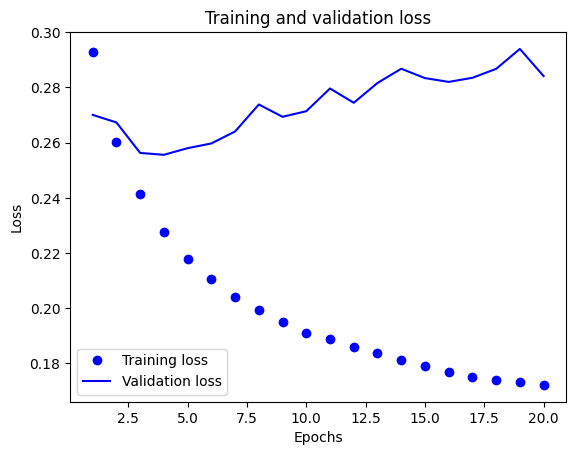

In [37]:
plot_losses(history)

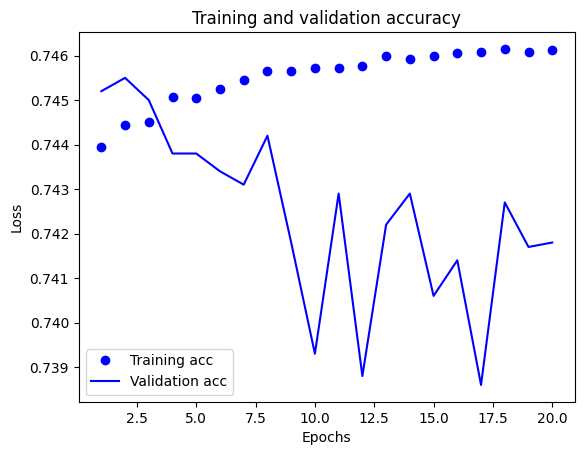

In [46]:
plot_accuracies(history)